## Maps and Interpretations

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
%matplotlib inline

In [7]:
# build dataframe
# import business data from Yelp
df = pd.read_csv('/Users/thomas/Documents/schoolwork/eco225/yelp_data/toronto_businesses.csv')
df = df.copy()

In [8]:
# from week 5 map exercise
# y variable map

# drop irrelevant postal codes
for i in range(2):
    df.drop(df['longitude'].idxmax(), axis=0, inplace=True)

# build geometry column
df['coordinates'] = list(zip(df['longitude'], df['latitude']))
df['coordinates'] = df['coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='coordinates')

# clean postal_code column for merge
gdf['postal_code'] = gdf['postal_code'].str[:3]
gdf_stars = gdf.groupby('postal_code')[['stars']].mean()
gdf_stars = gdf_stars.reset_index()

# import shp file
toronto = gpd.read_file('/Users/thomas/Documents/schoolwork/eco225/shp/lfsa000a21a_e/lfsa000a21a_e.shp')
toronto = toronto.rename(columns={'CFSAUID': 'postal_code'})
# drop more irrelevant postal codes
toronto = toronto[toronto['PRNAME'] == 'Ontario']

# merge datasets
t_stars = toronto.merge(gdf_stars, how='inner', on='postal_code')



Text(56.472222222222214, 0.5, 'Latitude')

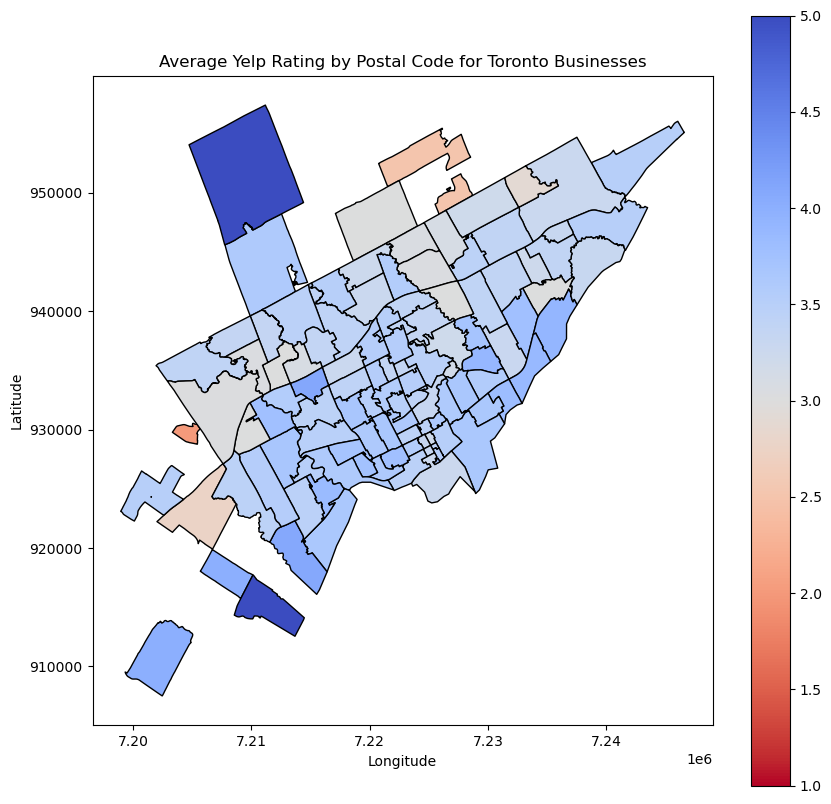

In [19]:
# plotting code for ratings map
fig, gax = plt.subplots(figsize=(10,10))
t_stars.plot(ax=gax, edgecolor='black', column='stars', cmap='coolwarm_r', vmin=1, vmax=5, legend=True)

plt.title('Average Yelp Rating by Postal Code for Toronto Businesses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

Text(56.472222222222214, 0.5, 'Latitude')

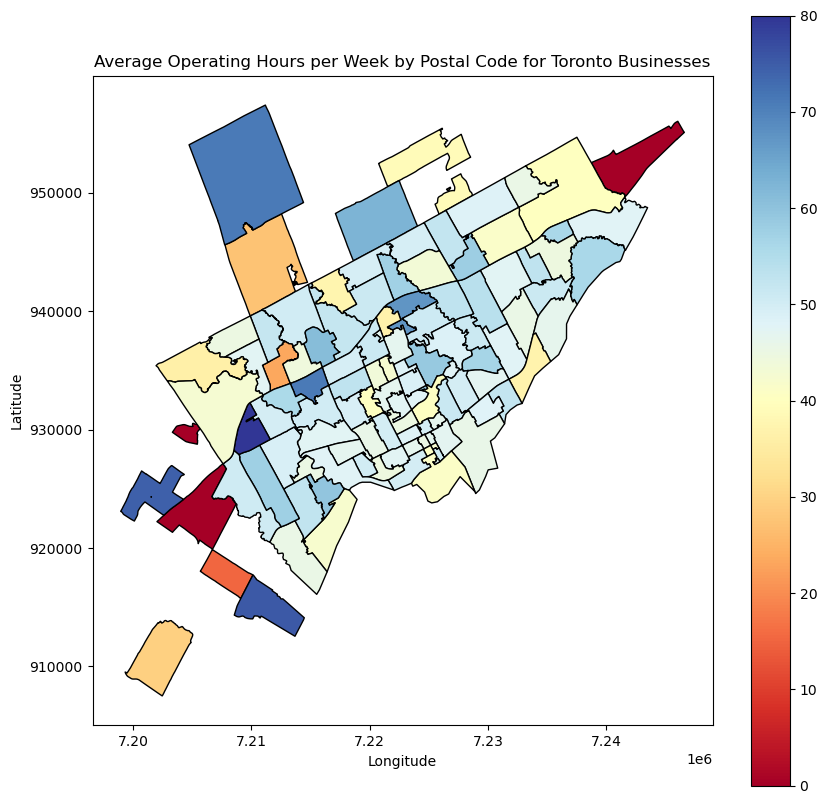

In [27]:
# wk_op_hours map
gdf_hours = gdf.groupby('postal_code')[['wk_op_hours']].mean()
t_hours = toronto.merge(gdf_hours, on='postal_code')

# plotting code for operating hours map
fig, gax = plt.subplots(figsize=(10,10))
t_hours.plot(ax=gax, edgecolor='black', column='wk_op_hours', cmap='RdYlBu', vmax=80, legend=True)

plt.title('Average Operating Hours per Week by Postal Code for Toronto Businesses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
